# Задание

    1) Возьмите из прошлого домашнего задания ряд — стационарный и не стационарный.
    2) Приблизьте оба варианта моделями из класса MA.
    3) Оцените качество и пришлите соображения, почему была выбрана та или иная модель.

In [ ]:
!git clone https://github.com/moskow23rus/Netology_Time-series_HW-2

fatal: destination path 'Netology_Time-series_HW-2' already exists and is not an empty directory.


In [ ]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

## 1) Скачиваем данные и приводим их к необходимому виду.

In [ ]:
airlines_passengers = pd.read_csv("Netology_Time-series_HW-2/international-airline-passengers.csv")

In [ ]:
#Создаем нестационарный ряд
series_non_stationary = airlines_passengers['Count']

#Создаем стационарный ряд
series_stationary = airlines_passengers['Count']

#Ниже приводим данные к стационарному ряду
series_stationary_bc = boxcox(series_stationary, 0)
series_stationary_dif = series_stationary_bc[1:] - series_stationary_bc[:-1]
series_stationary_no_season = series_stationary_dif[12:] - series_stationary_dif[:-12]

#Перезапишем стационарный ряд
series_stationary = series_stationary_no_season

## 2) Воспользуемся усредняющими моделями.

### а) Скользящая средняя MA.

In [ ]:
#Функция для расчета скользящего среднего
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

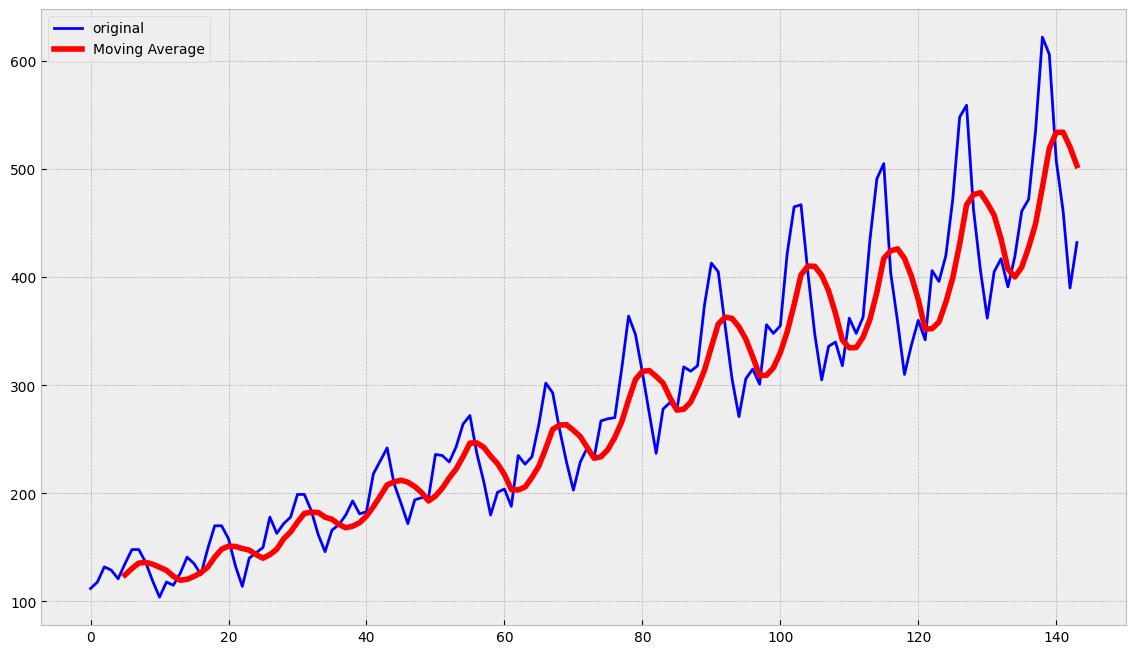

In [ ]:
#Ниже представлена функция усредненного ряда
ma_1 = moving_average(series_non_stationary, 6)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_non_stationary, color='blue', label='original')
    plt.plot(ma_1, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [ ]:
#Функция для предсказания ряда
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

<ipython-input-23-dcf0eee4b2bd>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)


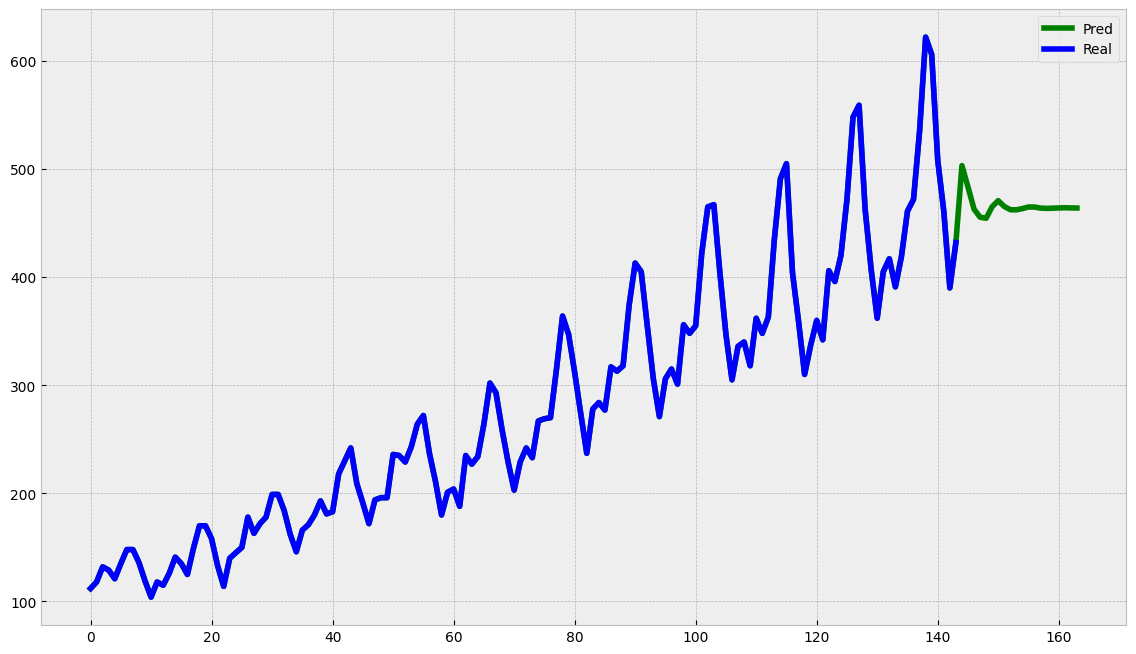

In [ ]:
series_pred_1 = predict(series_non_stationary, 6, 20)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred_1, color='green', linewidth='4', label='Pred')
    plt.plot(series_non_stationary, color='blue', linewidth='4', label='Real')
    plt.legend()

Обратим внимание, что после +-10 значения ряд превращается в константу.

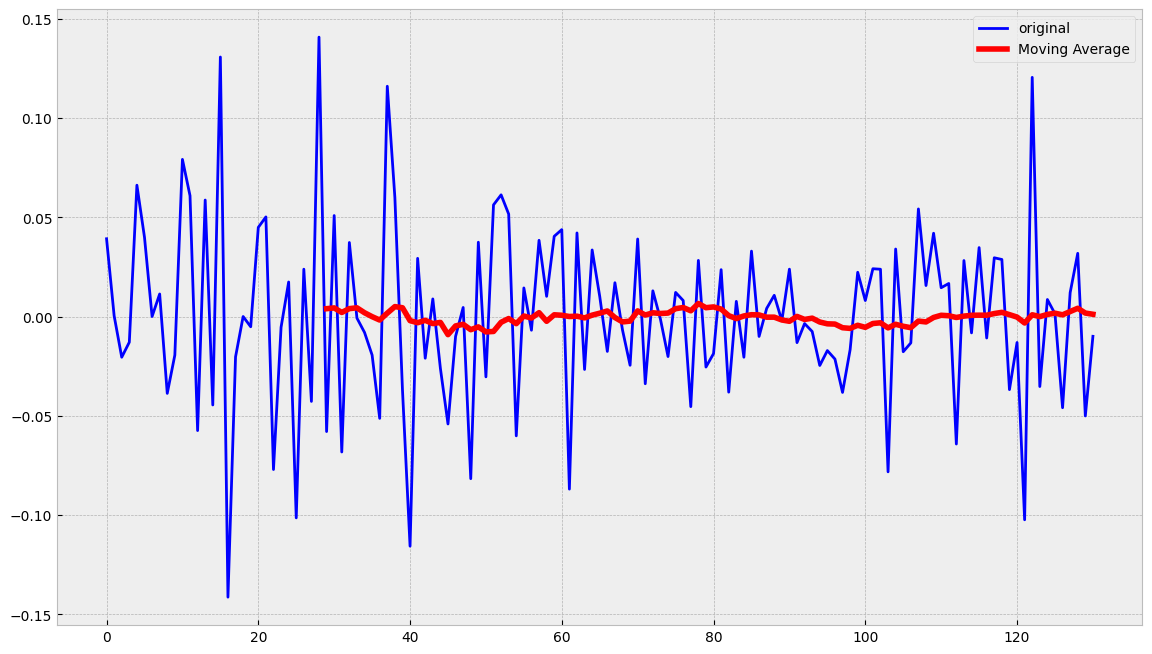

In [ ]:
ma_2 = moving_average(series_stationary, 30)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_stationary, color='blue',label='original')
    plt.plot(ma_2, color='red', linewidth='4', label='Moving Average')
    plt.legend()

В стационарном ряде МА практически не меняется и колеблется около 0.

### б) Взвешенная скользящая средняя WMA.

In [ ]:
#Функция для расчета взвешенной скользящей средней
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

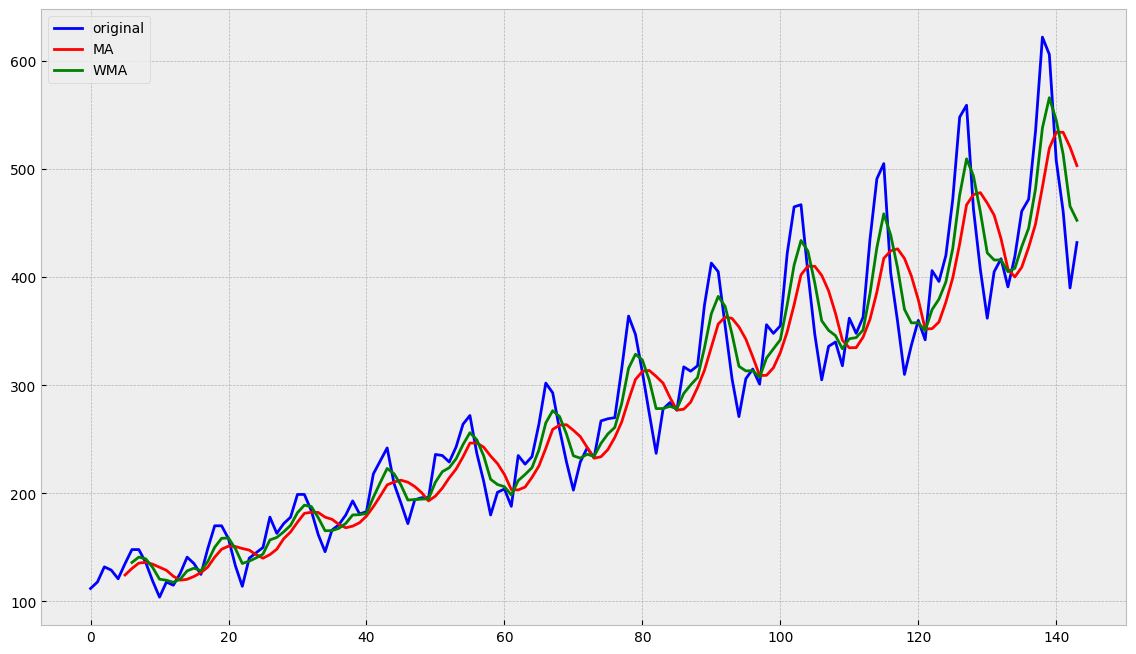

In [ ]:
#Построим взвешенную скользящую среднюю и сравним ее с обычной скользящей средней
wma_1 = weighted_moving_average(series_non_stationary, 7, [1,1,2,3,5,8,13])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_non_stationary, color='blue',label='original')
    plt.plot(ma_1, color='red', linewidth='2', label='MA')
    plt.plot(wma_1, color='green', linewidth='2', label='WMA')
    plt.legend()

Ниже сравним взвешенное скользящее среднее с обычным скользящим средним.

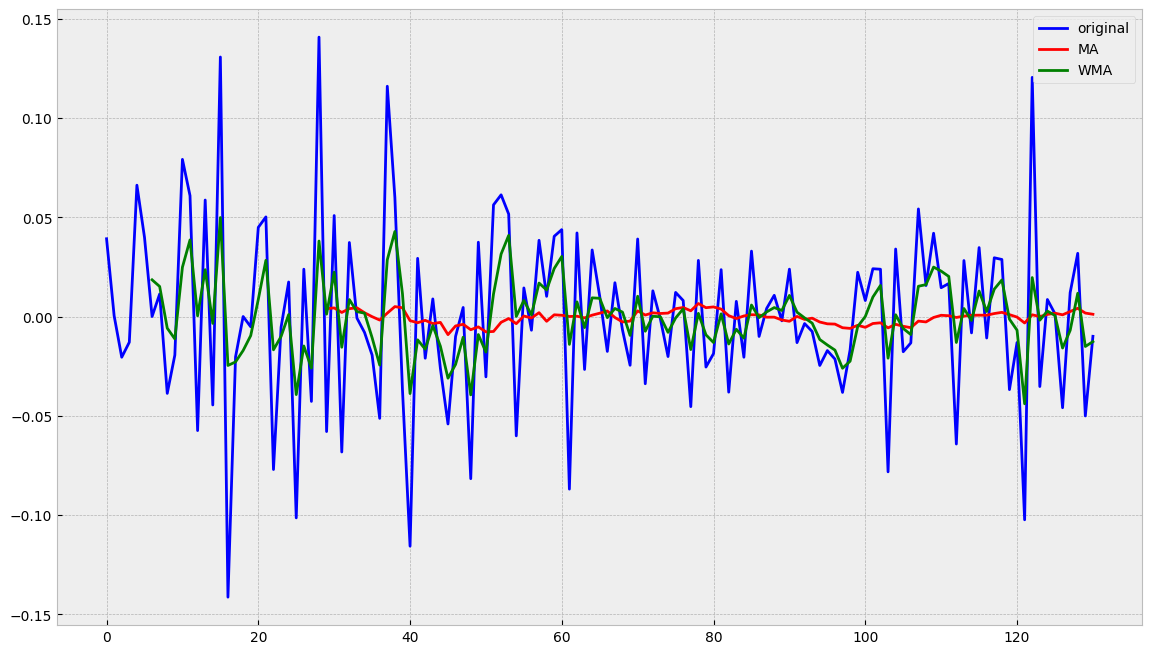

In [ ]:
wma_2 = weighted_moving_average(series_stationary, 7, [1,1,2,3,5,8,13])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_stationary, color='blue',label='original')
    plt.plot(ma_2, color='red', linewidth='2', label='MA')
    plt.plot(wma_2, color='green', linewidth='2', label='WMA')
    plt.legend()

В отличие от обычного скользящего среднего взвешенное сильней коррелирует с графиком ряда.

### в) Экспоненциальное сглаживание EMA.

In [ ]:
#Функция для расчета экспоненциального сглаживания
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

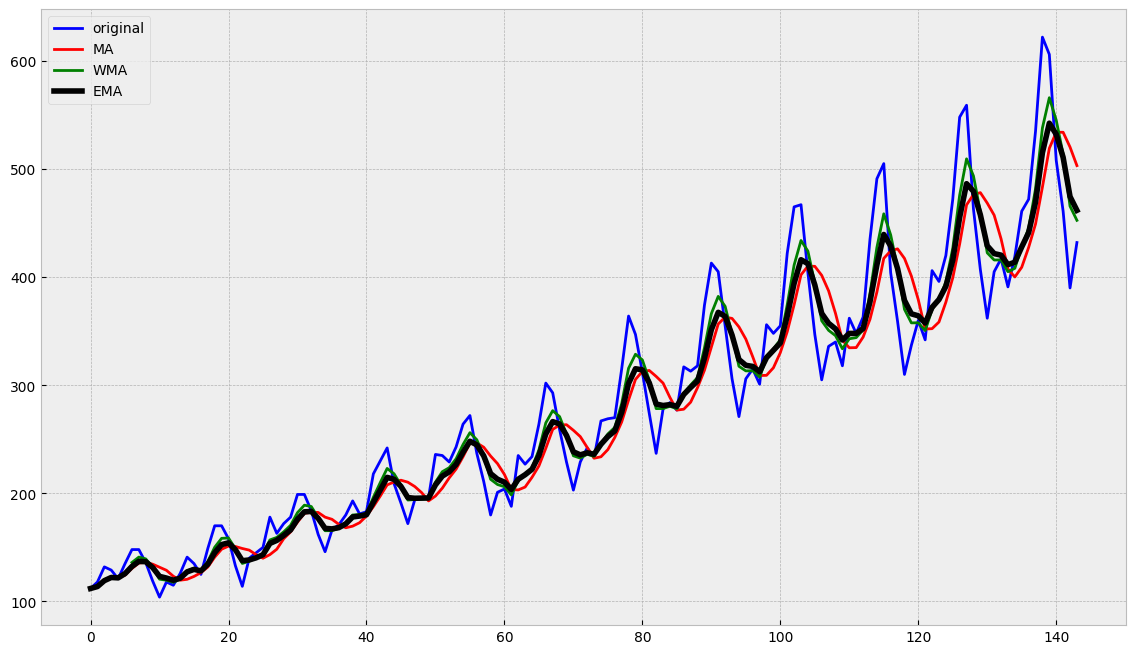

In [ ]:
ema_1 = exponential_moving_average(series_non_stationary, 0.3)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_non_stationary, color='blue',label='original')
    plt.plot(ma_1, color='red', linewidth='2', label='MA')
    plt.plot(wma_1, color='green', linewidth='2', label='WMA')
    plt.plot(ema_1, color='black', linewidth='4', label='EMA')
    plt.legend()

Видим, что значения экспоненциального сглаживания находятся между MA и WMA. Чем выше альфа, тем сильней коррелирует ЕМА с основным графиком.

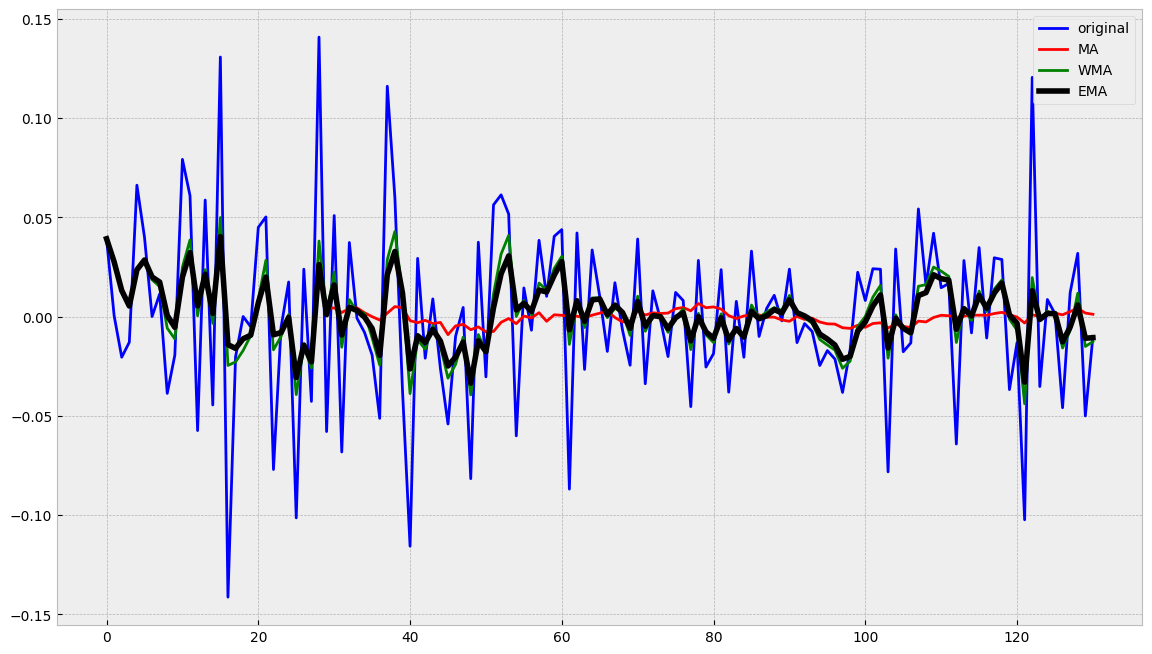

In [ ]:
ema_2 = exponential_moving_average(series_stationary, 0.3)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_stationary, color='blue',label='original')
    plt.plot(ma_2, color='red', linewidth='2', label='MA')
    plt.plot(wma_2, color='green', linewidth='2', label='WMA')
    plt.plot(ema_2, color='black', linewidth='4', label='EMA')
    plt.legend()

На стационарном ряде графики EMA и WMA практически совпадают.

In [ ]:
#Функция для предсказания ряда на основе EMA
def exponential_moving_average(series, alpha, n_pred=None):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n-1] + (1 - alpha) * result[n-1])
    if not n_pred:
        return pd.Series(result)

    predictions = [alpha * series[len(series) - 1] + (1 - alpha) * result[-1]]

    for _ in range(n_pred):
        res = alpha * predictions[-1] + (1 - alpha) * result[-1]
        result.append(res)
        predictions.append(res)

    return series.append(pd.Series(predictions), ignore_index=True), pd.Series(result)

<ipython-input-35-6efff81498c4>:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return series.append(pd.Series(predictions), ignore_index=True), pd.Series(result)


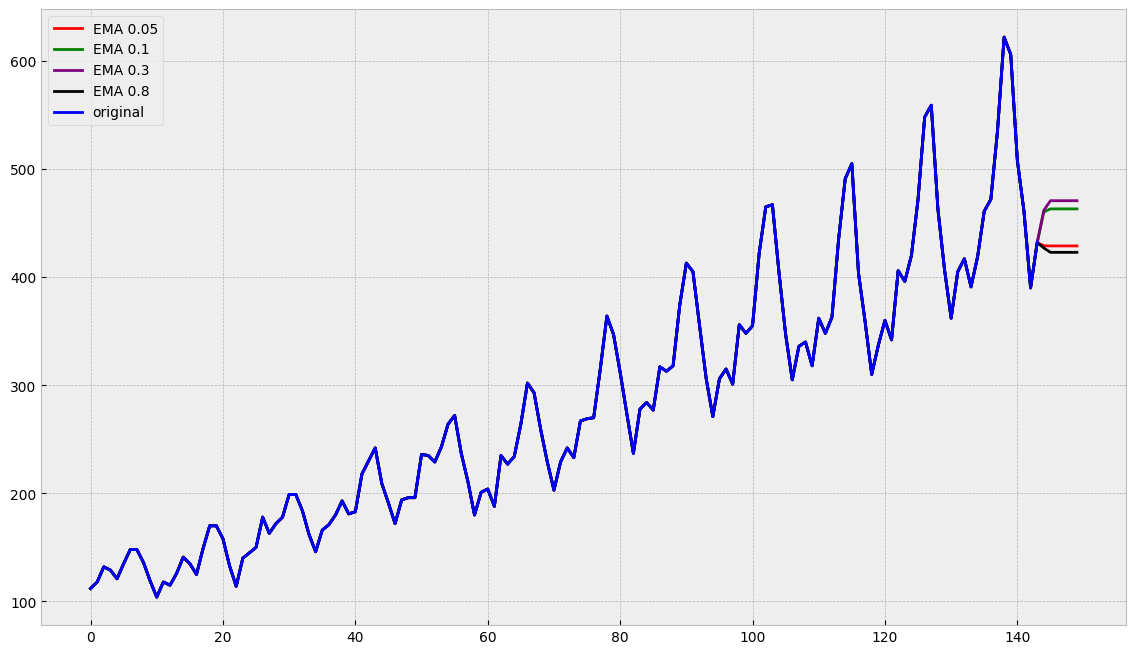

In [ ]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ma_1, _ = exponential_moving_average(series_non_stationary, alphas[i], 5)
        plt.plot(ma_1, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.plot(series_non_stationary, color='blue',label='original')
    plt.legend()

### г) Двойное экспоненциальное сглаживание DEMA.

In [ ]:
#Функция расчета DEMA
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

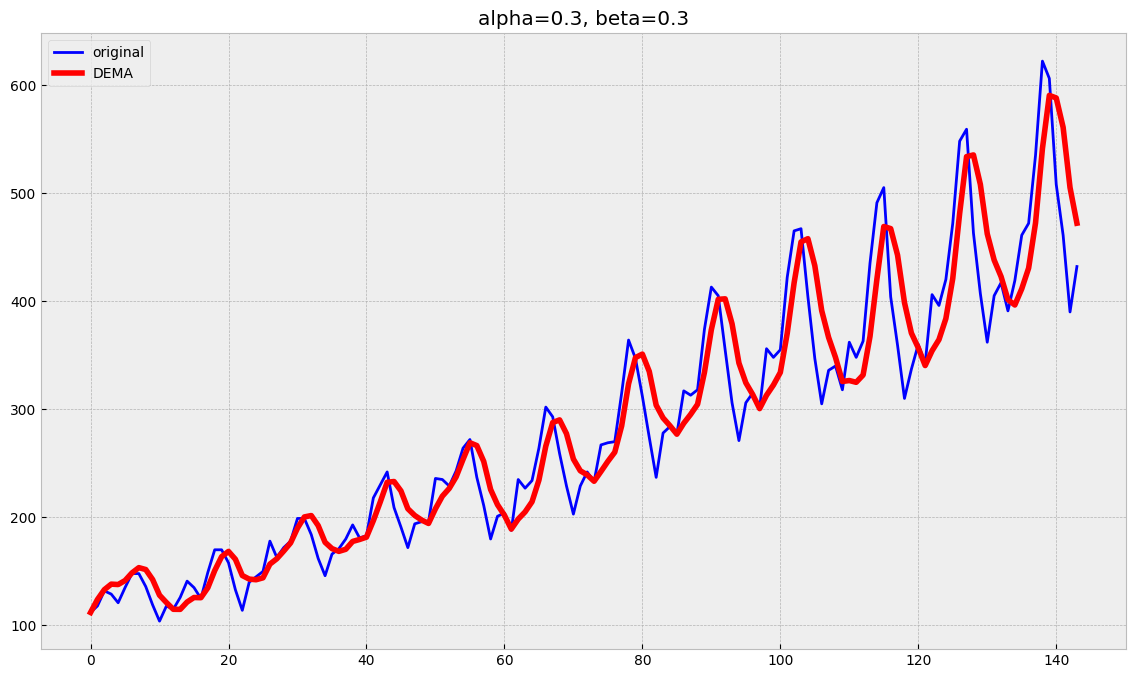

In [ ]:
#Функция отрисовки DEMA для нестационарного ряда
def plot_dema(alpha, beta):
    dema_1 = double_ema(series_non_stationary, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series_non_stationary, color='blue',label='original')
        plt.plot(dema_1, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

plot_dema(0.3, 0.3)

Посмотрим как ведет себя DEMA на данных стационарного ряда.

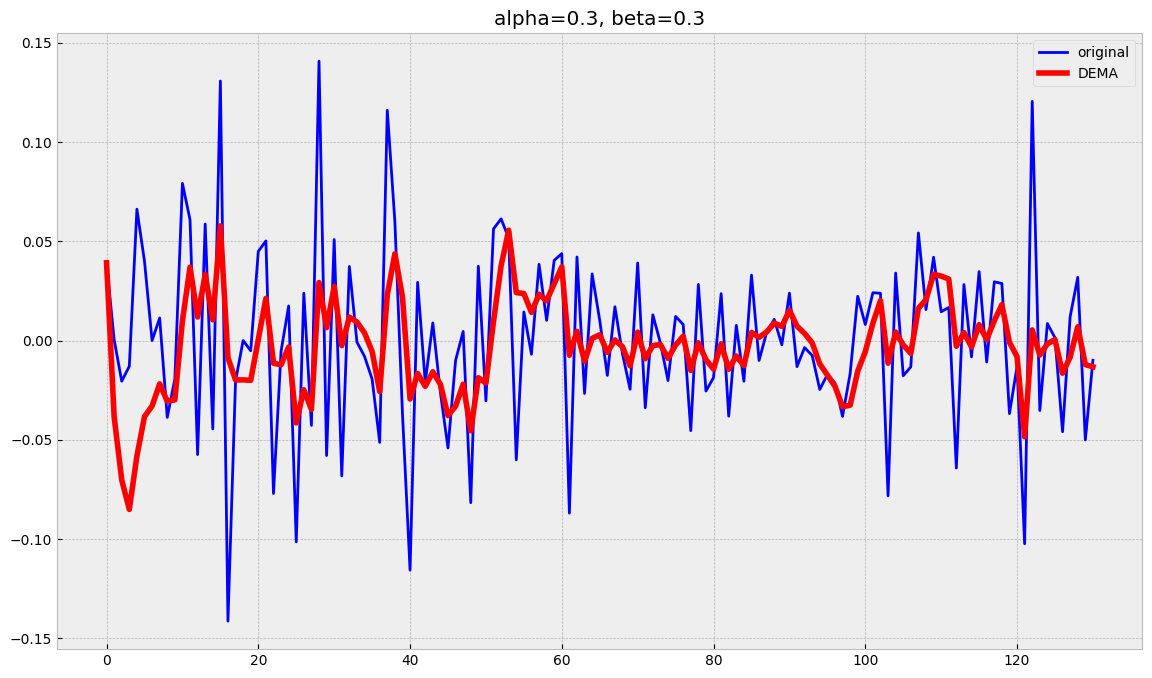

In [ ]:
def plot_dema_st(alpha, beta):
    dema_2 = double_ema(series_stationary, alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(series_stationary, color='blue',label='original')
        plt.plot(dema_2, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

plot_dema_st(0.3, 0.3)

В зависимости от подбора параметров альфы и бетты она будет усреднять и сглаживать ряд сильней или слабей.

Ниже предскажем несколько точек ряда на основе DEMA.

In [ ]:
#Функция предсказания на основе DEMA
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)

    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
        preds.append(level+trend)

    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)

<ipython-input-40-f0843a22202f>:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)


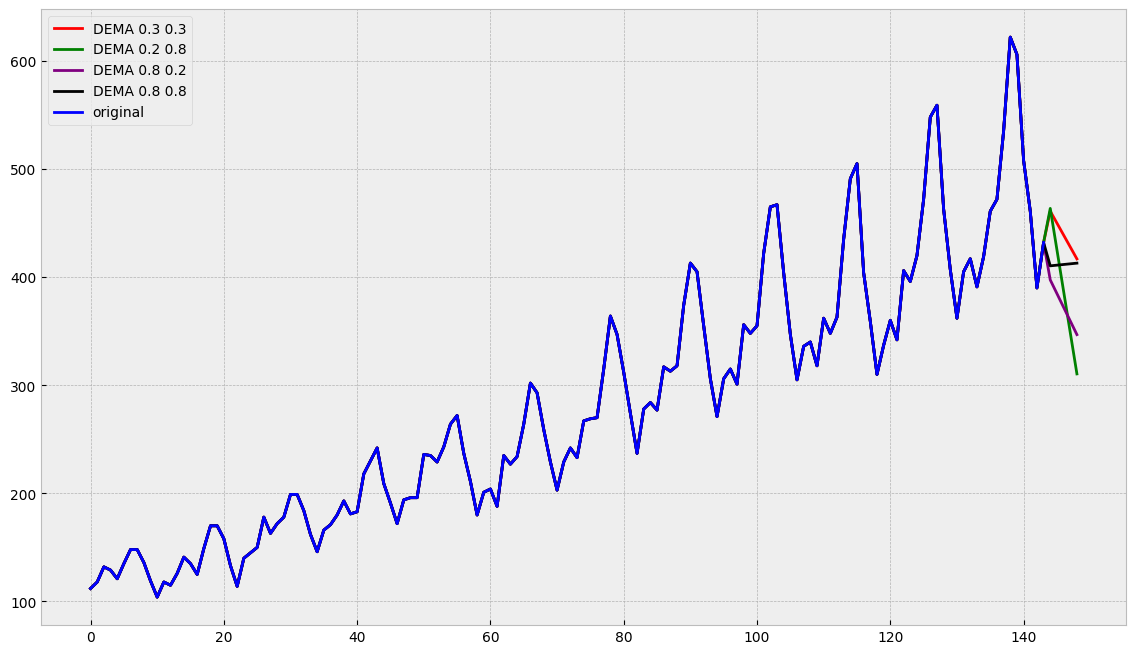

In [ ]:
alphas = [0.3,0.2,0.8,0.8]
bettas = [0.3,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ma_1, _ = double_ema_with_preds(series_non_stationary, alphas[i], bettas[i], 5)
        plt.plot(ma_1, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(series_non_stationary, color='blue',label='original')
    plt.legend()

### д) Хольт-Винтерс.

In [ ]:
#Функции для инициализации тренда
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [ ]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [ ]:
def plot_tema(alpha, beta, gamma, ser=series_non_stationary, ser_to_plot=series_non_stationary, n_preds=24):
    tema_1 = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema_1, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

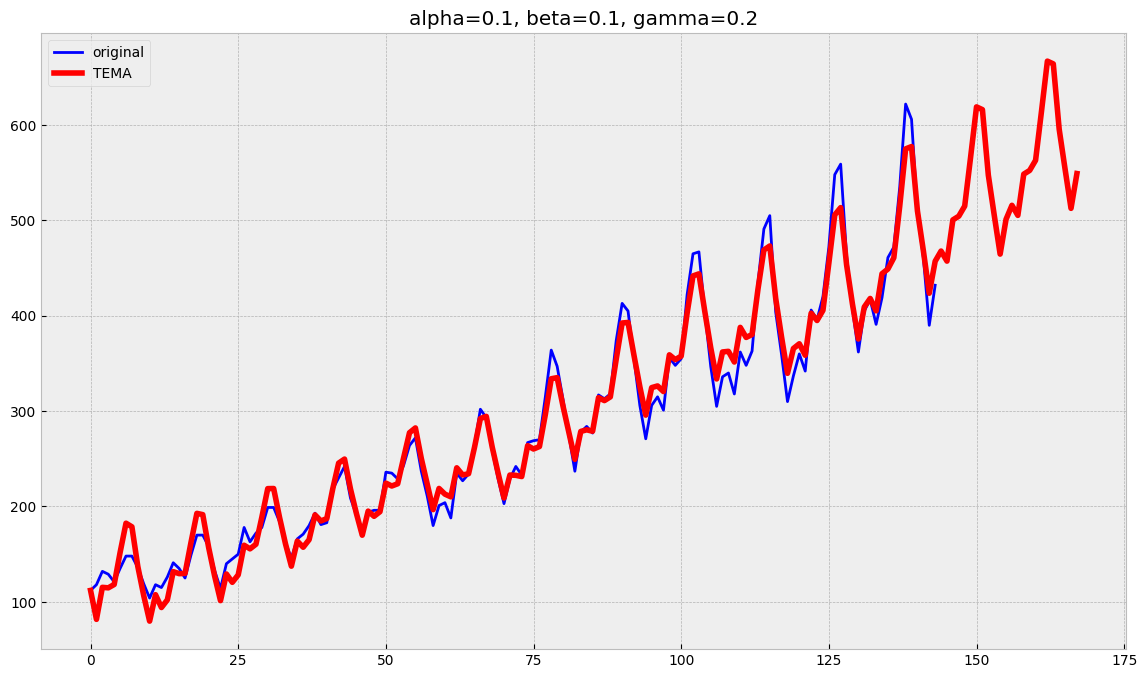

In [ ]:
plot_tema(0.1, 0.1, 0.2)

## 3) Посчитаем RMSE.

In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

train, test, val = series_non_stationary[:60], series_non_stationary[60:70], series_non_stationary[70:]

In [ ]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [ ]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [ ]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 175.55253454606682
        x: [ 2.678e-03  8.758e-01  0.000e+00]
      nit: 136
      jac: [ 1.514e+01  3.072e-02  1.057e+01]
     nfev: 856
     njev: 214
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


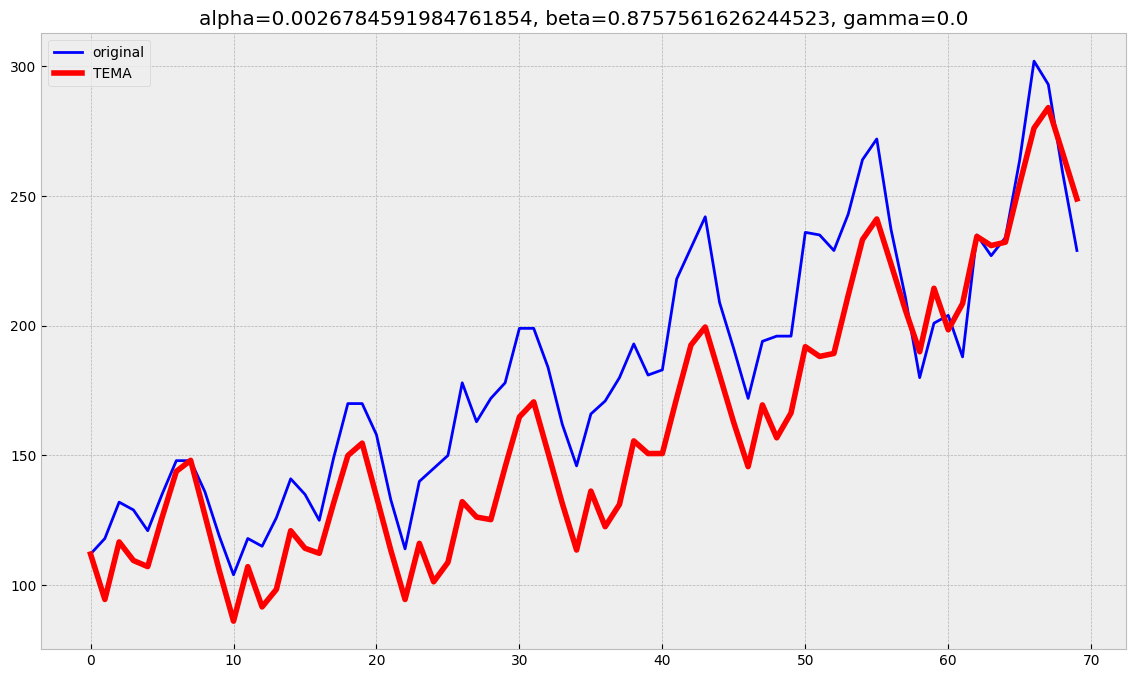

In [ ]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series_non_stationary[:70], n_preds=len(test))

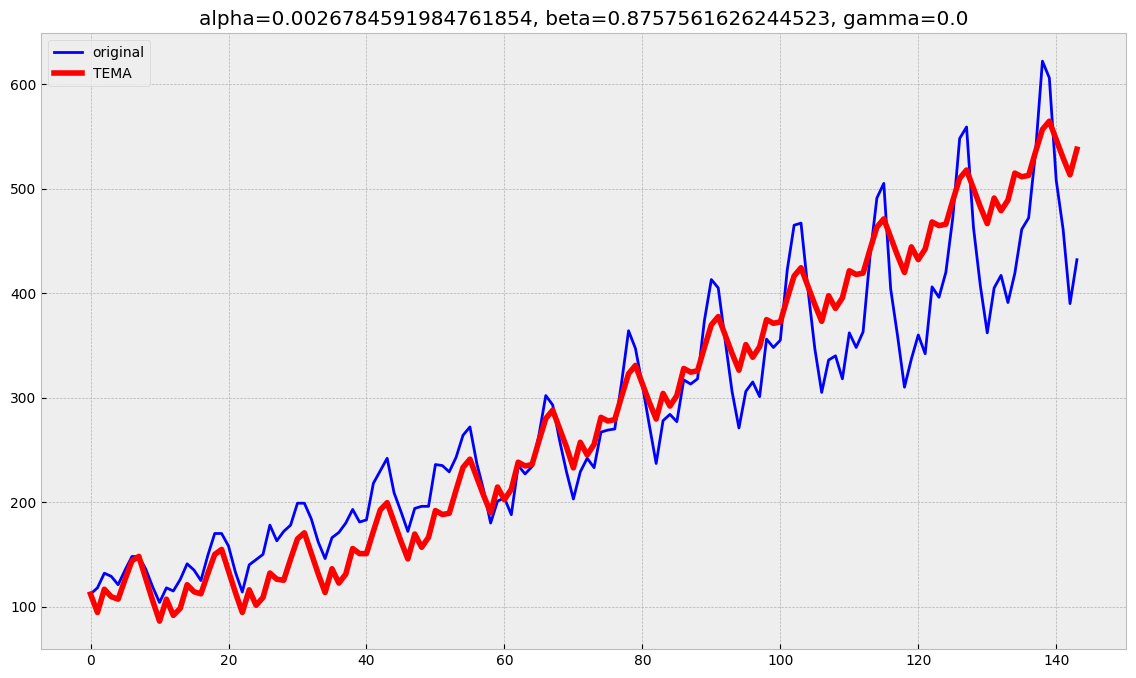

In [ ]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series_non_stationary[:70], ser_to_plot=series_non_stationary, n_preds=len(val))